Import necessary module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Generate data and plug them into X, Y

In [2]:
n_examples = 200
n_input = 2
n_hiddenlayer = 3
n_output = 2

data1 = np.random.randn(50, n_input)
data2 = np.random.randn(50, n_input) + np.array([0, 8])
data3 = np.random.randn(50, n_input) + np.array([8, 8])
data4 = np.random.randn(50, n_input) + np.array([8, 0])
X = np.vstack([data1, data2, data3, data4])
Y = np.vstack([np.ones([50,2])*[0,1], np.ones([50, 2])*[1,0],
            np.ones([50,2])*[0,1], np.ones([50, 2])*[1,0]]);

Draw data

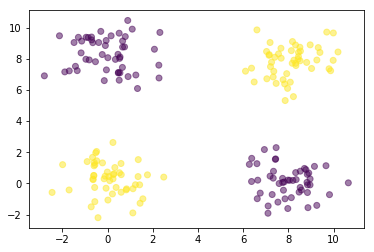

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), alpha=0.5)
plt.show()

Define some functions

In [4]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def feedforward(X, theta1, b1, theta2, b2):
    a1 = np.tanh(X.dot(theta1) + b1)
    a2 = softmax(a1.dot(theta2) + b2)
    return a1, a2

def predict(X, theta1, b1, theta2, b2):
    _, a2 = feedforward(X, theta1, b1, theta2, b2)
    return a2.argmax(axis=1)

def classification_rate(X, Y, theta1, b1, theta2, b2):
    _, a2 = feedforward(X, theta1, b1, theta2, b2)
    return np.mean(np.argmax(a2, axis=1) == np.argmax(Y, axis=1))

def cost(X, Y, theta1, b1, theta2, b2, reg_param=0):
    m = len(Y)
    _, a2 = feedforward(X, theta1, b1, theta2, b2)
    return -1.0/m * np.sum(Y*np.log(a2) + (1-Y)*np.log(1-a2)) \
            + reg_param/(2*m) * (np.sum(theta1*theta1) + np.sum(theta2*theta2))

def derivative_theta2(Y, a2, a1, reg_param=0, theta2=0):
    m = len(Y)
    dZ = a2 - Y
    return 1.0/m * a1.T.dot(dZ) + reg_param/m * theta2

def derivative_bias2(Y, a2):
    m = len(Y)
    dZ = a2 - Y
    return 1.0/m * dZ.sum(axis=0)

def derivative_theta1(Y, a2, theta2, a1, X, reg_param=0, theta1=0):
    m = len(Y)
    dZ = (a2 - Y).dot(theta2.T) * (1 - a1*a1)
    return 1.0/m * X.T.dot(dZ) + reg_param/m * theta1

def derivative_bias1(Y, a2, theta2, a1):
    m = len(Y)
    dZ = (a2 - Y).dot(theta2.T) * (1 - a1*a1)
    return 1.0/m * dZ.sum(axis=0)

Define variables

In [5]:
theta2 = np.random.randn(n_hiddenlayer, n_output)
b2 = np.random.randn(1, n_output)
theta1 = np.random.randn(n_input, n_hiddenlayer)
b1 = np.random.randn(1, n_hiddenlayer)
learning_rate = 0.03
reg_param = 0.
n_epochs = 10000
cost_list = []

Run gradient descent

In [6]:
cost_list.append(cost(X, Y, theta1, b1, theta2, b2, reg_param))
for _ in range(n_epochs):
    a1, a2 = feedforward(X, theta1, b1, theta2, b2)
    theta2 -= learning_rate * derivative_theta2(Y, a2, a1, reg_param, theta2)
    b2 -= learning_rate * derivative_bias2(Y, a2)
    theta1 -= learning_rate * derivative_theta1(Y, a2, theta2, a1, X, reg_param, theta1)
    b1 -= learning_rate * derivative_bias1(Y, a2, theta2, a1)
    cost_list.append(cost(X, Y, theta1, b1, theta2, b2, reg_param))

Draw cost graph

Classification rate:  1.0


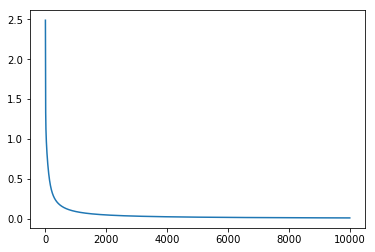

In [7]:
print "Classification rate: ", classification_rate(X, Y, theta1, b1, theta2, b2)
plt.plot(cost_list)
plt.show()